# Car Price Prediction Project

This is the first medium project of ***Machine Learning*** course. In this project, apply many algorithms commonly used for regression problems.

Also, apply various processes such as pre-processing, ***train-test split*** and ***cross validation*** that  will be used in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

# Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. 

In this Senario, estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Supervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.4f}'.format

In [2]:
df = pd.read_csv('car_to_ML.csv')

In [3]:
df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.0000,Compact,Used,Yes,120200.0000,Manual,Diesel,Dealer,1595.0000,5.0000,98.0000,Front,Alloy wheels,1270.0000,No,Cloth,2.0000,efficient,6.0000,75.0000,3.8000,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.0000,Compact,Pre-registered,Yes,5000.0000,Automatic,Electric,Dealer,1.0000,1.0000,0.0000,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.0000,No,Part/Full Leather,1.0000,efficient,0.0000,215.0000,2.3590,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.0000,Compact,Used,Yes,18900.0000,Automatic,Benzine,Dealer,1991.0000,8.0000,162.0000,4WD,Alloy wheels,1555.0000,No,Part/Full Leather,2.0000,unefficient,2.0000,310.0000,8.4000,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.0000,Compact,Used,Yes,18995.0000,Automatic,Benzine,Dealer,1991.0000,7.0000,169.0000,4WD,Sport seats,1455.0000,No,Part/Full Leather,2.0000,unefficient,2.0000,225.0000,7.3000,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.0000,Compact,Used,Yes,197000.0000,Automatic,Diesel,Dealer,2143.0000,7.0000,162.0000,4WD,Alloy wheels,1545.0000,No,Part/Full Leather,2.0000,unefficient,7.0000,100.0000,4.9000,Standard,Standard,Safety Premium Plus Package


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [5]:
df.describe()

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kW,cons_avg
count,26711.0000,26711.0000,26711.0000,26711.0000,26711.0000,26711.0000,26711.0000,26711.0000,26711.0000,26711.0000
mean,23537.2405,68863.8119,1708.9647,5.8201,129.5258,1425.2054,1.4601,5.1664,118.4144,5.5317
std,20811.9863,62794.1464,772.4397,1.4169,54.2552,307.3869,0.8527,4.6548,65.6425,2.2203
min,490.0000,0.0000,0.0000,1.0000,0.0000,347.0000,1.0000,0.0000,33.0000,0.0000
25%,12490.0000,19155.0000,1248.0000,5.0000,105.0000,1228.0000,1.0000,2.0000,80.0000,4.3000
50%,18440.0000,54000.0000,1595.0000,6.0000,123.0000,1375.0000,1.0000,4.0000,100.0000,5.2000
75%,28330.0000,100675.0000,1969.0000,6.0000,150.0000,1597.0000,2.0000,7.0000,135.0000,6.4000
max,549000.0000,667128.0000,6300.0000,8.0000,399.0000,3150.0000,9.0000,20.0000,450.0000,18.3000


In [6]:
df.duplicated().sum()

1815

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.make_model.value_counts()

make_model
Renault Megane              825
SEAT Leon                   757
Dacia Sandero               721
Hyundai i30                 699
Opel Astra                  634
Ford Mustang                572
Peugeot 308                 536
Nissan Qashqai              484
Ford Focus                  483
SEAT Ibiza                  433
Volvo V40                   430
Fiat Tipo                   415
Fiat 500                    413
Renault Clio                404
Ford Fiesta                 392
Nissan Micra                380
Fiat 500X                   373
Skoda Octavia               359
Opel Corsa                  358
Dacia Duster                343
Toyota Yaris                323
Opel Insignia               290
Volvo C70                   281
Peugeot 208                 260
Skoda Fabia                 246
Fiat 500C                   238
Toyota Auris                231
Peugeot RCZ                 220
Hyundai TUCSON              216
Peugeot 3008                215
Ford Kuga                   2

In [9]:
#To ensure sufficient observations for each brand and model, we will exclude 
#brand models with less than 100 observations from our dataset.

In [10]:
model_counts = df['make_model'].value_counts()
df = df[df['make_model'].isin(model_counts[model_counts >= 100].index)]

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18197 entries, 0 to 18196
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     18197 non-null  object 
 1   make                           18197 non-null  object 
 2   location                       18197 non-null  object 
 3   price                          18197 non-null  float64
 4   body_type                      18197 non-null  object 
 5   type                           18197 non-null  object 
 6   warranty                       18197 non-null  object 
 7   mileage                        18197 non-null  float64
 8   gearbox                        18197 non-null  object 
 9   fuel_type                      18197 non-null  object 
 10  seller                         18197 non-null  object 
 11  engine_size                    18197 non-null  float64
 12  gears                          18197 non-null 

## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal. 

In [13]:
# make_model describes make
df.drop('make', axis=1, inplace=True)

In [14]:
df['location'] = df['location'].str[-2:]

In [15]:
df.location.value_counts()

location
DE    7976
ES    4487
NL    1687
IT    1598
BE    1064
FR     997
AT     361
LU      26
BG       1
Name: count, dtype: int64

In [16]:
#df.drop(columns='location', inplace=True)

In [17]:
df_object = df.select_dtypes(include='O')
df_object

,make_model,location,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,extras,full_service_history,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,BE,Compact,Used,Yes,Manual,Diesel,Dealer,Front,"Alloy wheels, Automatically dimming interior m...",No,Part/Full Leather,unefficient,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,DE,Compact,Used,No,Manual,Diesel,Dealer,Front,"Alloy wheels, Automatically dimming interior m...",Yes,Cloth,unefficient,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,ES,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,Cloth,unefficient,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,ES,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,Cloth,unefficient,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,ES,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,Cloth,unefficient,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18192,Volvo V40,BE,Sedan,Used,No,Manual,Diesel,Private seller,Front,"All season tyres, Ambient lighting, Cargo barr...",Yes,Cloth,efficient,Standard,Standard,Safety Premium Package
18193,Volvo S60,ES,Sedan,Used,Yes,Manual,Benzine,Dealer,Front,Alloy wheels,No,Part/Full Leather,efficient,Standard,Standard,Safety Premium Package
18194,Volvo S90,ES,Sedan,Used,Yes,Automatic,Diesel,Dealer,4WD,Alloy wheels,No,Part/Full Leather,efficient,Standard,Standard,Safety Premium Plus Package
18195,Volvo C30,BE,Sedan,Used,Yes,Manual,Diesel,Dealer,Front,"Alloy wheels, Automatically dimming interior m...",Yes,Cloth,unefficient,Standard,Standard,Safety Premium Package


In [18]:
#Cehck the cardinality of object columns
for i in df_object.columns:
    print(f'{i:<30}:',df[i].nunique())

make_model                    : 70
location                      : 9
body_type                     : 6
type                          : 4
warranty                      : 2
gearbox                       : 3
fuel_type                     : 4
seller                        : 2
drivetrain                    : 3
extras                        : 6478
full_service_history          : 2
upholstery                    : 2
energy_efficiency_class       : 2
comfort_&_convenience_Package : 3
entertainment_&_media_Package : 2
safety_&_security_Package     : 3


### Converting the Extras feature from object to numeric

In [19]:
df.extras.sample(3)

13282    Alloy wheels (17"), Automatically dimming inte...
12794                                         Alloy wheels
4574                                          Alloy wheels
Name: extras, dtype: object

In [20]:
#Check the number of extras for each observation
df.extras.apply(lambda x: len(x.split(',')))

0        5
1        6
2        1
3        1
4        1
        ..
18192    9
18193    1
18194    1
18195    3
18196    2
Name: extras, Length: 18197, dtype: int64

In [21]:
df['extras'] = df.extras.apply(lambda x: len(x.split(',')))

## multicollinearity control

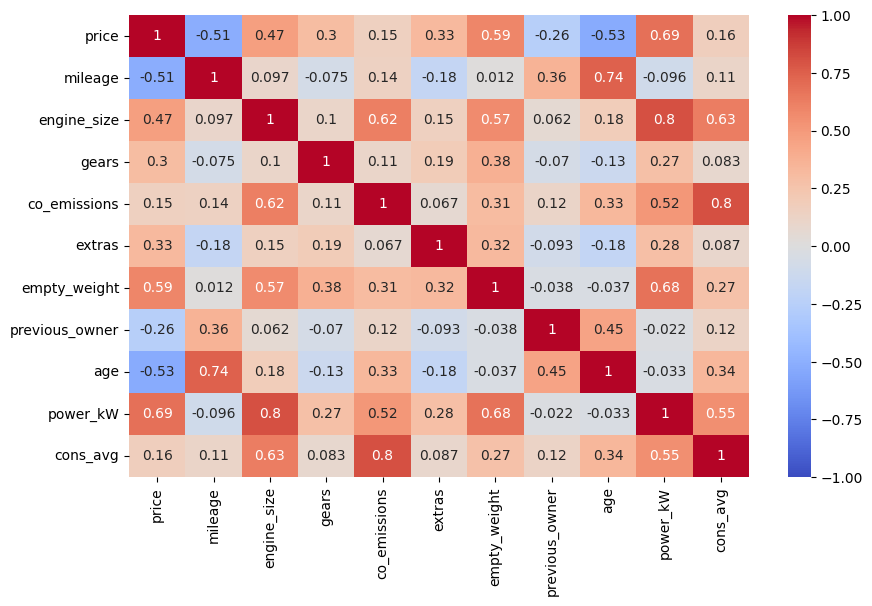

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True,cmap='coolwarm');

In [23]:
#Check abs(corr)>=0.9
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)] .any().any()

False

### VIF (Variance Inflation Factor) Score for Multicolliniearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    vif_data = dataframe.copy()
    vif_data = vif_data.select_dtypes(include=['number'])  # Only numeric columns
    
    # Create a DataFrame to store the VIF values
    vif_df = pd.DataFrame()
    vif_df["Feature"] = vif_data.columns
    vif_df["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    
    return vif_df

In [25]:
vif_result = calculate_vif(df.drop(columns='price'))
vif_result

,Feature,VIF
0,mileage,5.4711
1,engine_size,25.1961
2,gears,21.6753
3,co_emissions,23.5048
4,extras,2.7808
5,empty_weight,38.7578
6,previous_owner,4.7987
7,age,6.8797
8,power_kW,17.8679
9,cons_avg,24.7057


## Outliers in Price Column

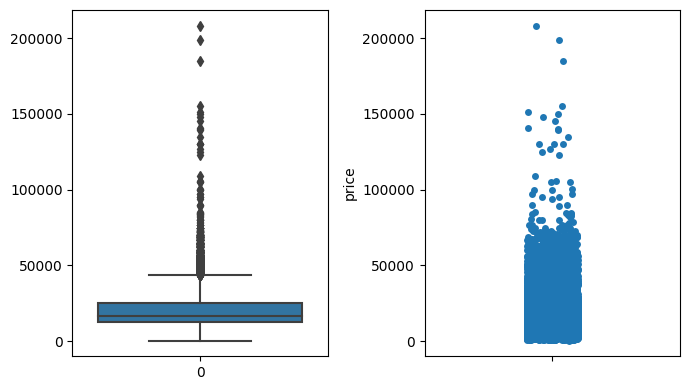

In [26]:
#price
plt.subplot(121)
sns.boxplot(df.price)

plt.subplot(122)
sns.stripplot(df.price)
plt.tight_layout();

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [27]:
X = df.drop(columns='price')
y = df.price

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### OneHotEncoder & OrdinalEncoder

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [30]:
df_object.columns

Index(['make_model', 'location', 'body_type', 'type', 'warranty', 'gearbox',
       'fuel_type', 'seller', 'drivetrain', 'extras', 'full_service_history',
       'upholstery', 'energy_efficiency_class',
       'comfort_&_convenience_Package', 'entertainment_&_media_Package',
       'safety_&_security_Package'],
      dtype='object')

In [31]:
cat_onehot = ['make_model', 'location', 'body_type', 'gearbox', 'fuel_type', 'seller', 'drivetrain',
              'upholstery', 'energy_efficiency_class']
cat_ordinal = ['warranty', 'full_service_history', 'type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package',
               'safety_&_security_Package']

cat_for_warranty = ["No", "Yes"]
cat_for_full_service_history = ["No", "Yes"]
cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [32]:
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_warranty,
                                          cat_for_full_service_history,
                                          cat_for_type,
                                          cat_for_comfort,
                                          cat_for_ent,
                                          cat_for_safety])

column_trans = make_column_transformer((enc_onehot, cat_onehot),
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough', 
                                        verbose_feature_names_out=False).set_output(transform="pandas") # MinMaxScaler()

In [33]:
column_trans.fit_transform(X_train)

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai IONIQ,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Juke,make_model_Nissan Micra,make_model_Nissan Pulsar,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota RAV 4,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,location_AT,location_BE,location_BG,location_DE,location_ES,location_FR,location_IT,location_LU,location_NL,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,seller_Dealer,seller_Private seller,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,upholstery_Cloth,upholstery_Part/Full Leather,energy_efficiency_class_efficient,energy_efficiency_class_unefficient,warranty,full_service_history,type,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kW,cons_avg
16734,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,98027.0000,1560.0000,6.0000,89.0000,1,1472.0000,3.0000,7.0000,84.0000,3.9000
14781,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics


### Pipeline
- Read the documentation and apply pipeline on the rest of the notebook
- link : https://scikit-learn.org/stable/modules/compose.html

What happens can be described as follows:
The data are split into TRAINING data and TEST data according to ratio of train_test_split

***fit process:***

Step 1: the onehotencoder is fitted on the categoric features in cat_onehot list for TRAINING data

Step 2: the onehotencoder transforms the categoric features in cat_onehot list for TRAINING data

step 3: the ordinalencoder is fitted on the categoric features in cat_ordinal list for TRAINING data

Step 4: the ordinalencoder transforms the categoric features in cat_ordinal list for TRAINING data

step 5: the numeric features of TRAINING data are left as they are

Step 6: the minmaxscaler is fitted on all features of transformed TRAINING data

Step 7: the minmaxscaler transforms all features of transformed TRAINING data

Step 8: the models are fitted/trained using the scaled and transformed TRAINING data

***predict process:***

Step 1: the onehotencoder transforms the categoric features in cat_onehot list of TEST data according to TRAINING data

Step 2: the ordinalencoder transforms the categoric features in cat_ordinal list of TEST data according to TRAINING data

step 3: the numeric features of TRAINING data are left as they are

Step 4: the minmaxscaler transforms all features of TEST data according to TRAINING data

Step 5: the trained models predict using the scaled and transformed TEST data

pipe_model.fit(X_train, y_train) --> columns_trans.fit_transform(X_train) --> scaler.fit_transform(X_train_trans)--> Lasso.fit(X_train_trans_and_scaled, y_train)

pipe_model.predict(X_test)       --> columns_trans.transform(X_test)      -->   scaler.transform(X_test_trans) -->Lasso.predict(X_test_trans_and_scaled)


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : mean_squared_error(y_train, y_train_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : mean_squared_error(y_test, y_pred, squared=False),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("liner_model", LinearRegression())]

lm = Pipeline(steps=operations)
lm.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'location',
                                                   'body_type', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain', 'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['N...
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['warranty',
                                                   'full_service_history',
                                                   'type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('liner_model', LinearRegression())])

In [36]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.8342,0.8311
mae,2836.6004,2808.5165
mse,26656012.3808,24479269.4434
rmse,5162.9461,4947.6529
mape,0.2027,0.1955


### Cross Validate

In [44]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("liner_model", LinearRegression())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [45]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.1614,0.0165,0.8647,0.8305,-2985.3434,-2826.9309,-22795428.3736,-27110344.9224,-4774.4558,-5206.7595,-0.2215,-0.2019
2,0.1338,0.0081,0.8538,0.8322,-2748.4423,-2862.3884,-19576183.3832,-27480912.8492,-4424.4981,-5242.2240,-0.2005,-0.2056
3,0.1742,0.0000,0.8421,0.8333,-2871.1305,-2851.2018,-22933777.1497,-27091254.1237,-4788.9223,-5204.9259,-0.2160,-0.2031
4,0.1269,0.0161,0.8493,0.8325,-2787.4231,-2845.4378,-21728191.9612,-27228738.8200,-4661.3509,-5218.1164,-0.2018,-0.2038
5,0.1412,0.0248,0.8466,0.8328,-2788.6580,-2846.9968,-22560738.9732,-27133809.1863,-4749.8146,-5209.0123,-0.2008,-0.2029
6,0.1461,0.0161,0.8325,0.8343,-2846.6648,-2837.4107,-29186282.5563,-26389793.1109,-5402.4330,-5137.0997,-0.2092,-0.2029
7,0.1448,0.0127,0.7953,0.8389,-3000.3235,-2815.2639,-37482755.5199,-25501729.9283,-6122.3162,-5049.9238,-0.2106,-0.2014
8,0.1570,0.0165,0.8492,0.8325,-2723.5052,-2863.7075,-20983431.0584,-27318256.8150,-4580.7675,-5226.6870,-0.2016,-0.2038
9,0.1635,0.0085,0.7906,0.8403,-3015.7959,-2804.4325,-43453459.5512,-24838080.9944,-6591.9238,-4983.7818,-0.1992,-0.2022
10,0.1434,0.0157,-2443594562456321523712.0000,0.8363,-16585498359097.4082,-2829.0582,-400239589578660407481722732544.0000,-26259823.3031,-632644915871976.6250,-5124.4339,-650411700.4310,-0.2042


In [46]:
scores.iloc[:,2:].mean()

test_r2                                            -244359456245632139264.0000
train_r2                                                                0.8344
test_neg_mean_absolute_error                               -1658549838486.4695
train_neg_mean_absolute_error                                       -2838.2829
test_neg_mean_squared_error                -40023958957866042507390877696.0000
train_neg_mean_squared_error                                    -26635274.4053
test_neg_root_mean_squared_error                          -63264491591807.3125
train_neg_root_mean_squared_error                                   -5160.2964
test_neg_mean_absolute_percentage_error                         -65041170.2292
train_neg_mean_absolute_percentage_error                               -0.2032
dtype: float64

In [40]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.8342,0.8311
mae,2836.6004,2808.5165
mse,26656012.3808,24479269.4434
rmse,5162.9461,4947.6529
mape,0.2027,0.1955


In [41]:
y_pred = lm.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lm_mape= mean_absolute_percentage_error(y_test, y_pred)

## Ridge

In [42]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'location',
                                                   'body_type', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain', 'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['N...
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['warranty',
                                                   'full_service_history',
                                                   'type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [43]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.8342,0.8311
mae,2830.6838,2801.9844
mse,26654837.1706,24478175.4861
rmse,5162.8323,4947.5424
mape,0.2019,0.1946


### Cross Validate

In [44]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [45]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.0800,0.0140,0.8651,0.8305,-2969.5814,-2819.2387,-22725831.1765,-27105557.9789,-4767.1618,-5206.2998,-0.2196,-0.2006
2,0.0990,0.0196,0.8542,0.8321,-2738.8672,-2856.1968,-19526684.6550,-27484990.6780,-4418.9008,-5242.6130,-0.1988,-0.2046
3,0.0953,0.0168,0.8424,0.8333,-2864.5560,-2844.5160,-22880871.1273,-27094466.2328,-4783.3954,-5205.2345,-0.2150,-0.2020
4,0.1081,0.0183,0.8495,0.8325,-2778.2624,-2838.2057,-21698059.1786,-27233619.8209,-4658.1176,-5218.5841,-0.2006,-0.2026
5,0.1044,0.0090,0.8466,0.8328,-2776.4293,-2838.0105,-22555351.1542,-27129770.4904,-4749.2474,-5208.6246,-0.1993,-0.2017
6,0.0956,0.0170,0.8323,0.8343,-2843.4052,-2831.0565,-29219884.9208,-26393839.1315,-5405.5421,-5137.4935,-0.2078,-0.2017
7,0.1003,0.0173,0.7950,0.8389,-2985.9452,-2804.3205,-37527945.4967,-25495888.8197,-6126.0057,-5049.3454,-0.2084,-0.1998
8,0.1443,0.0258,0.8499,0.8326,-2708.0743,-2854.9478,-20883908.1798,-27313884.9813,-4569.8915,-5226.2687,-0.1997,-0.2025
9,0.1314,0.0257,0.7900,0.8404,-3005.9448,-2795.0724,-43582277.1829,-24819397.9890,-6601.6874,-4981.9071,-0.1984,-0.2007
10,0.1116,0.0146,0.8131,0.8364,-2874.3360,-2820.8078,-30606236.1258,-26245273.2348,-5532.2903,-5123.0141,-0.1866,-0.2026


In [46]:
scores.iloc[:,2:].mean()

test_r2                                            0.8338
train_r2                                           0.8344
test_neg_mean_absolute_error                   -2854.5402
train_neg_mean_absolute_error                  -2830.2373
test_neg_mean_squared_error                -27120704.9198
train_neg_mean_squared_error               -26631668.9357
test_neg_root_mean_squared_error               -5161.2240
train_neg_root_mean_squared_error              -5159.9385
test_neg_mean_absolute_percentage_error           -0.2034
train_neg_mean_absolute_percentage_error          -0.2019
dtype: float64

### Prediction Error

In [47]:
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

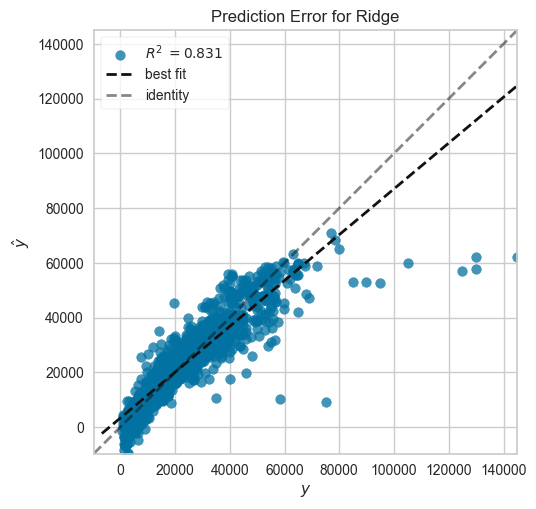

In [48]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)

# Fit the pipeline on the training data
ridge_model.fit(X_train, y_train)

# Visualize Prediction Error
visualizer_pred_error = PredictionError(ridge_model)
visualizer_pred_error.fit(X_train, y_train)
visualizer_pred_error.score(X_test, y_test)
visualizer_pred_error.show();

### Residual Plot

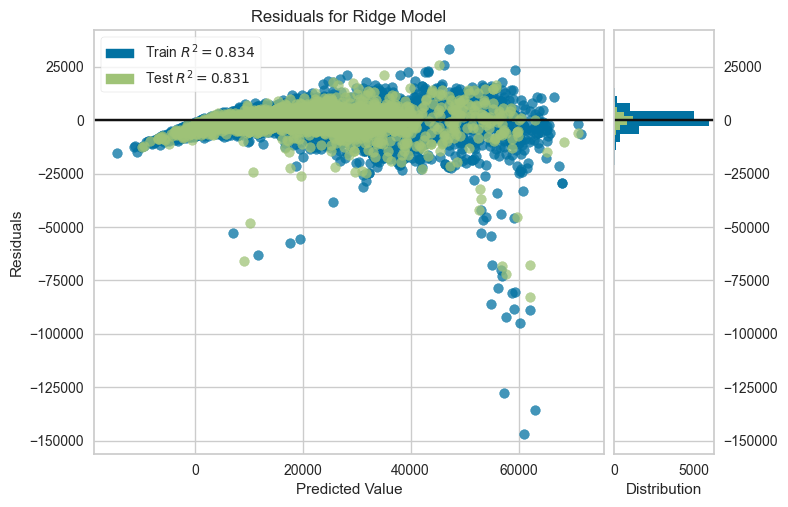

In [49]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)

# Fit the pipeline on the training data
ridge_model.fit(X_train, y_train)

# Visualize Residuals
visualizer_residuals = ResidualsPlot(ridge_model)
visualizer_residuals.fit(X_train, y_train)
visualizer_residuals.score(X_test, y_test)
visualizer_residuals.show();

### Dropping outliers from the dataset

In [50]:
df = df[(df.price > 7500)&(df.price <70000)]

In [51]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'location',
                                                   'body_type', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain', 'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['N...
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['warranty',
                                                   'full_service_history',
                                                   'type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [53]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.8824,0.8794
mae,2548.8335,2466.9605
mse,13825470.2647,13119528.0197
rmse,3718.2617,3622.0889
mape,0.1302,0.1299


### Finding best alpha for Ridge

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
alpha_space = np.linspace(0.001, 100, 100)

In [56]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha': alpha_space} # Parameter names should be used together with the model name defined
                                           # in the pipeline.

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                                param_grid=param_grid,
                                scoring='neg_root_mean_squared_error',
                                cv=10,
                                n_jobs=-1,
                                return_train_score=True)

In [57]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'location',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [58]:
ridge_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'location',
                                                   'body_type', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain', 'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['N...
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['warranty',
                                                   'full_service_history',
                                                   'type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Ridge', Ridge(alpha=1.011090909090909))])

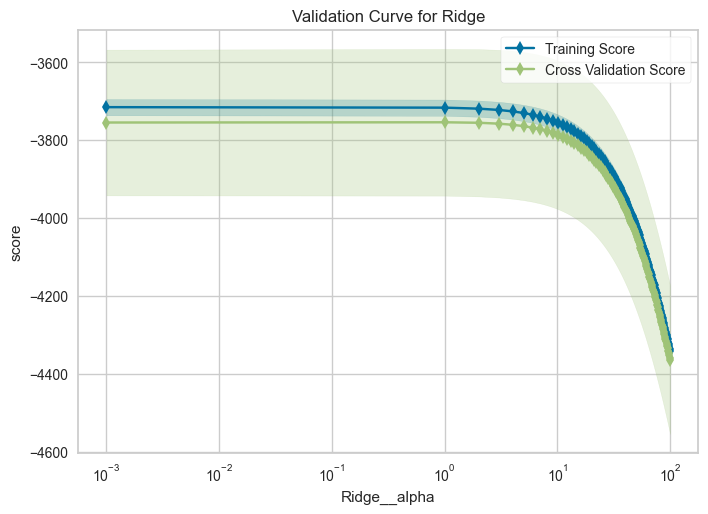

<Axes: title={'center': 'Validation Curve for Ridge'}, xlabel='Ridge__alpha', ylabel='score'>

In [59]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
                        pipe_model, 
                        param_name="Ridge__alpha", 
                        param_range=np.linspace(0.001, 100, 100),
                        logx=True, 
                        cv=10, 
                        scoring="neg_root_mean_squared_error", 
                        n_jobs=-1,
)

viz.fit(X_train, y_train)
viz.show()

In [60]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3753.8252
mean_train_score   -3716.2793
Name: 1, dtype: object

In [61]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.8824,0.8794
mae,2548.8186,2466.9360
mse,13825616.5761,13119636.9084
rmse,3718.2814,3622.1039
mape,0.1302,0.1299


In [62]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [63]:
from sklearn.linear_model import Lasso

In [64]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'location',
                                                   'body_type', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain', 'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['N...
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['warranty',
                                                   'full_service_history',
                                                   'type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [65]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.8821,0.8788
mae,2551.4598,2467.7862
mse,13862129.7127,13182144.1685
rmse,3723.1881,3630.7223
mape,0.1303,0.1299


### Cross Validation

In [66]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [67]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.8797
train_r2                                           0.8822
test_neg_mean_absolute_error                   -2573.3100
train_neg_mean_absolute_error                  -2550.6523
test_neg_mean_squared_error                -14140446.5962
train_neg_mean_squared_error               -13845150.1540
test_neg_root_mean_squared_error               -3755.5871
train_neg_root_mean_squared_error              -3720.8486
test_neg_mean_absolute_percentage_error           -0.1314
train_neg_mean_absolute_percentage_error          -0.1303
dtype: float64

### Finding best alpha for Lasso

In [68]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space} # Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                                param_grid=param_grid,
                                scoring='neg_root_mean_squared_error',
                                cv=10,
                                n_jobs=-1,
                                return_train_score=True)

In [69]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'location',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [70]:
lasso_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'location',
                                                   'body_type', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain', 'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['N...
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['warranty',
                                                   'full_service_history',
                                                   'type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

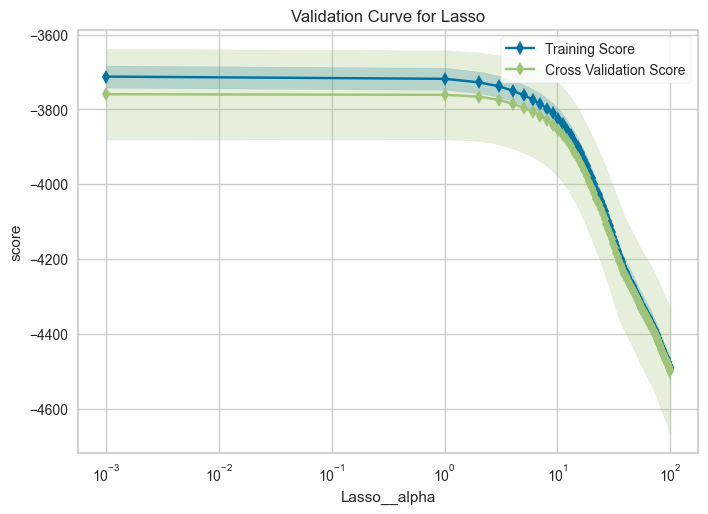

<Axes: title={'center': 'Validation Curve for Lasso'}, xlabel='Lasso__alpha', ylabel='score'>

In [71]:
viz = ValidationCurve(
                        model, 
                        param_name="Lasso__alpha", 
                        param_range=np.linspace(0.001, 100, 100),
                        logx=True, 
                        cv=5, 
                        scoring="neg_root_mean_squared_error", 
                        n_jobs=-1,
)

viz.fit(X_train, y_train)
viz.show()

In [72]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3754.3403
mean_train_score   -3714.9935
Name: 0, dtype: object

In [73]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.8825,0.8794
mae,2550.7044,2469.7908
mse,13817494.5730,13113276.6549
rmse,3717.1891,3621.2258
mape,0.1305,0.1302


In [74]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasm_mape= mean_absolute_percentage_error(y_test, y_pred)

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [75]:
from sklearn.linear_model import ElasticNet

In [76]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'location',
                                                   'body_type', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain', 'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['N...
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['warranty',
                                                   'full_service_history',
                                                   'type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [77]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.4620,0.4630
mae,5723.1619,5596.0264
mse,63252943.3859,58398661.9140
rmse,7953.1719,7641.9017
mape,0.3059,0.3063


### Cross Validation

In [78]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [79]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.4616
train_r2                                           0.4626
test_neg_mean_absolute_error                   -5723.8430
train_neg_mean_absolute_error                  -5719.2534
test_neg_mean_squared_error                -63288862.3025
train_neg_mean_squared_error               -63178430.2805
test_neg_root_mean_squared_error               -7950.0109
train_neg_root_mean_squared_error              -7948.4550
test_neg_mean_absolute_percentage_error           -0.3059
train_neg_mean_absolute_percentage_error          -0.3057
dtype: float64

### Finding best alpha and l1_ratio for ElasticNet

In [80]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[0.001,0.01, 0.5, 1, 2,  3, 4],
              'ElasticNet__l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=model,
                                  param_grid=param_grid,
                                  scoring='neg_root_mean_squared_error',
                                  cv=10,
                                  n_jobs = -1,
                                  return_train_score=True)

In [81]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'location',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder...
                                                                          'comfort_&_convenience_Package',
                                                                          'entertainment_&_media_Package',
                                                                          'safety_&_security_Package'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [0.001, 0.01, 0.5, 1, 2, 3, 4],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [82]:
elastic_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'location',
                                                   'body_type', 'gearbox',
                                                   'fuel_type', 'seller',
                                                   'drivetrain', 'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['N...
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['warranty',
                                                   'full_service_history',
                                                   'type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('ElasticNet', ElasticNet(alpha=0.001, l1_ratio=0.95))])

In [83]:
pd.DataFrame(elastic_grid_model.cv_results_).loc[elastic_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3753.7330
mean_train_score   -3715.5174
Name: 3, dtype: object

In [84]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.8824,0.8794
mae,2549.3745,2467.7932
mse,13821465.7569,13116599.9287
rmse,3717.7232,3621.6847
mape,0.1303,0.1300


In [85]:
y_pred = elastic_grid_model.predict(X_test)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = mean_squared_error(y_test, y_pred, squared=False)
em_mape= mean_absolute_percentage_error(y_test, y_pred)

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model 

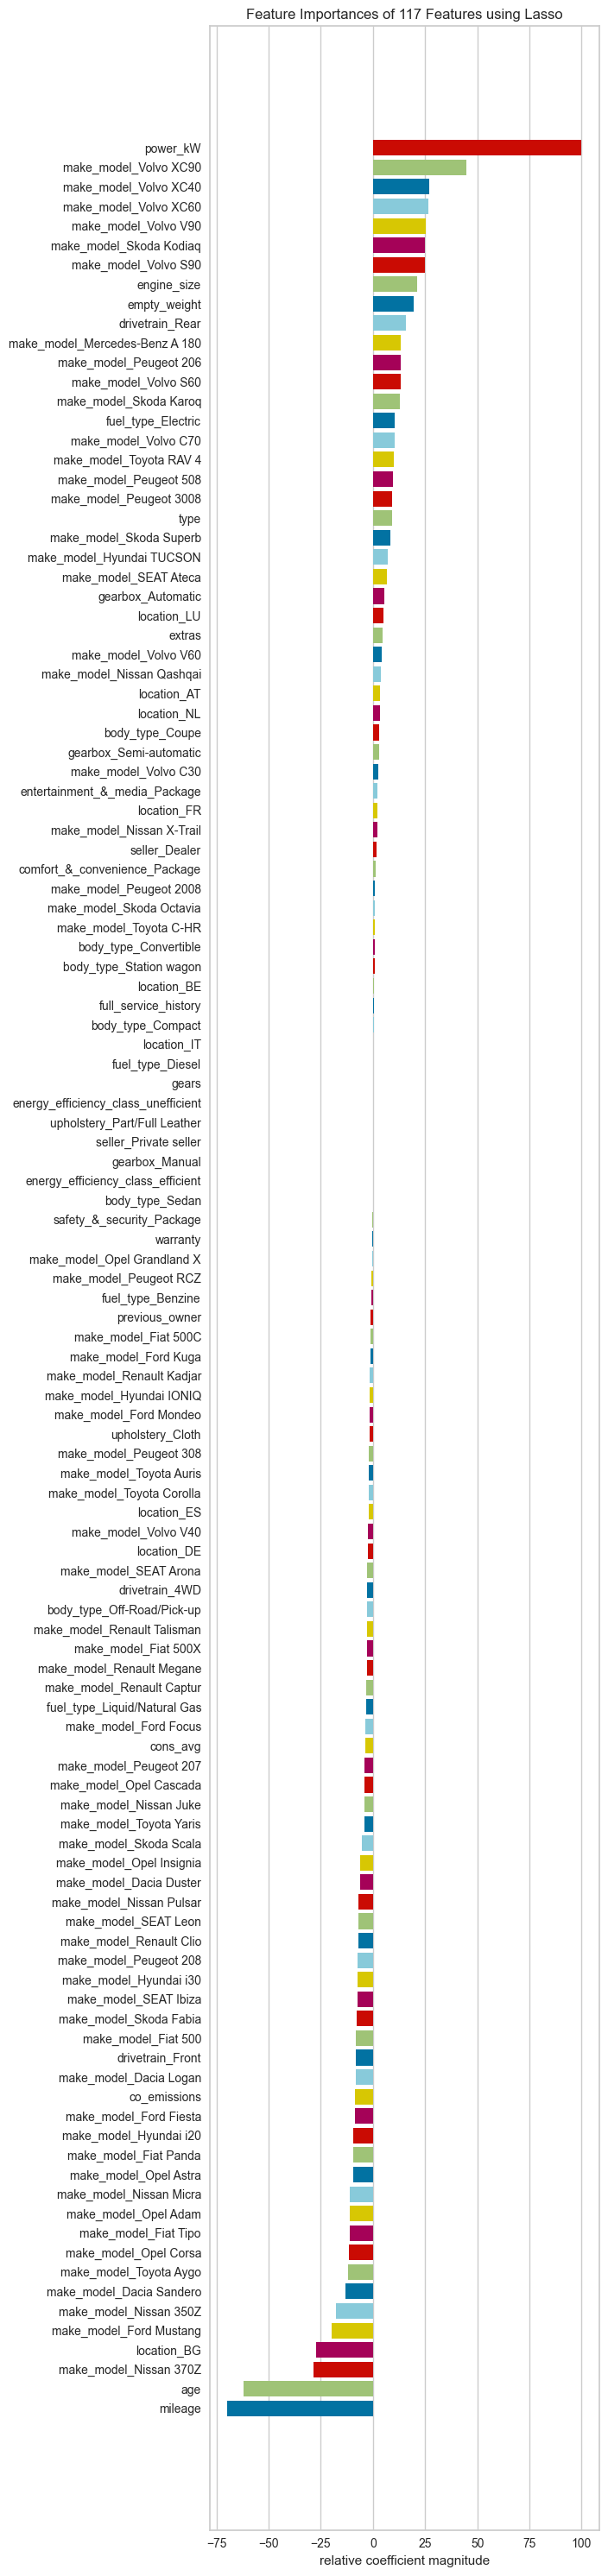

In [86]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"]

viz = FeatureImportances(model,
                         labels=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

In [87]:
df_new = df[["make_model", "power_kW", "mileage","age", "engine_size", "type", "price"]]

In [88]:
df_new

,make_model,power_kW,mileage,age,engine_size,type,price
0,Mercedes-Benz A 180,85.0000,27150.0000,2.0000,1461.0000,Used,24400.0000
2,Mercedes-Benz A 180,85.0000,21734.0000,2.0000,1461.0000,Used,29800.0000
3,Mercedes-Benz A 180,80.0000,172700.0000,4.0000,1461.0000,Used,21000.0000
4,Mercedes-Benz A 180,85.0000,18989.0000,2.0000,1461.0000,Used,26800.0000
5,Mercedes-Benz A 180,100.0000,25.0000,1.0000,1332.0000,Pre-registered,32900.0000
...,...,...,...,...,...,...,...
18190,Volvo S90,140.0000,93757.0000,4.0000,1969.0000,Used,27190.0000
18191,Volvo S90,140.0000,93757.0000,4.0000,1969.0000,Used,27190.0000
18192,Volvo V40,88.0000,114000.0000,4.0000,1969.0000,Used,13000.0000
18194,Volvo S90,288.0000,40345.0000,3.0000,1969.0000,Used,37600.0000


In [89]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
cat_onehot = ['make_model']
cat_ordinal = ['type']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                                       (OrdinalEncoder(categories= [cat_for_type]), cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

In [92]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.8658,0.8600
mae,2765.8832,2680.1066
mse,15773600.1862,15221429.6410
rmse,3971.5992,3901.4651
mape,0.1403,0.1398


### Cross Validate

In [93]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [94]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.8640
train_r2                                           0.8659
test_neg_mean_absolute_error                   -2783.8795
train_neg_mean_absolute_error                  -2764.9864
test_neg_mean_squared_error                -15980577.7400
train_neg_mean_squared_error               -15762787.0997
test_neg_root_mean_squared_error               -3992.6004
train_neg_root_mean_squared_error              -3970.1760
test_neg_mean_absolute_percentage_error           -0.1413
train_neg_mean_absolute_percentage_error          -0.1403
dtype: float64

In [95]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)

## 7. Visually Compare Models Performance In a Graph

In [96]:
compare = pd.DataFrame({"Model": ["linear_m","ridge_m", "lasso_m", "elastic_m", "final_m"],
                        "r2_score": [lm_R2, rm_R2, lasm_R2, em_R2, fm_R2],
                        "mae": [lm_mae, rm_mae, lasm_mae, em_mae, fm_mae],
                        "rmse": [lm_rmse, rm_rmse, lasm_rmse, em_rmse, fm_rmse],
                        "mape": [lm_mape, rm_mape, lasm_mape, em_mape, fm_mape]})
compare

,Model,r2_score,mae,rmse,mape
0,linear_m,0.8311,2808.5165,4947.6529,0.1955
1,ridge_m,0.8794,2466.9360,3622.1039,0.1299
2,lasso_m,0.8794,2469.7908,3621.2258,0.1302
3,elastic_m,0.8794,2467.7932,3621.6847,0.1300
4,final_m,0.8600,2680.1066,3901.4651,0.1398


In [97]:
compare.sort_values(by="r2_score", ascending=False)

,Model,r2_score,mae,rmse,mape
2,lasso_m,0.8794,2469.7908,3621.2258,0.1302
3,elastic_m,0.8794,2467.7932,3621.6847,0.1300
1,ridge_m,0.8794,2466.9360,3622.1039,0.1299
4,final_m,0.8600,2680.1066,3901.4651,0.1398
0,linear_m,0.8311,2808.5165,4947.6529,0.1955


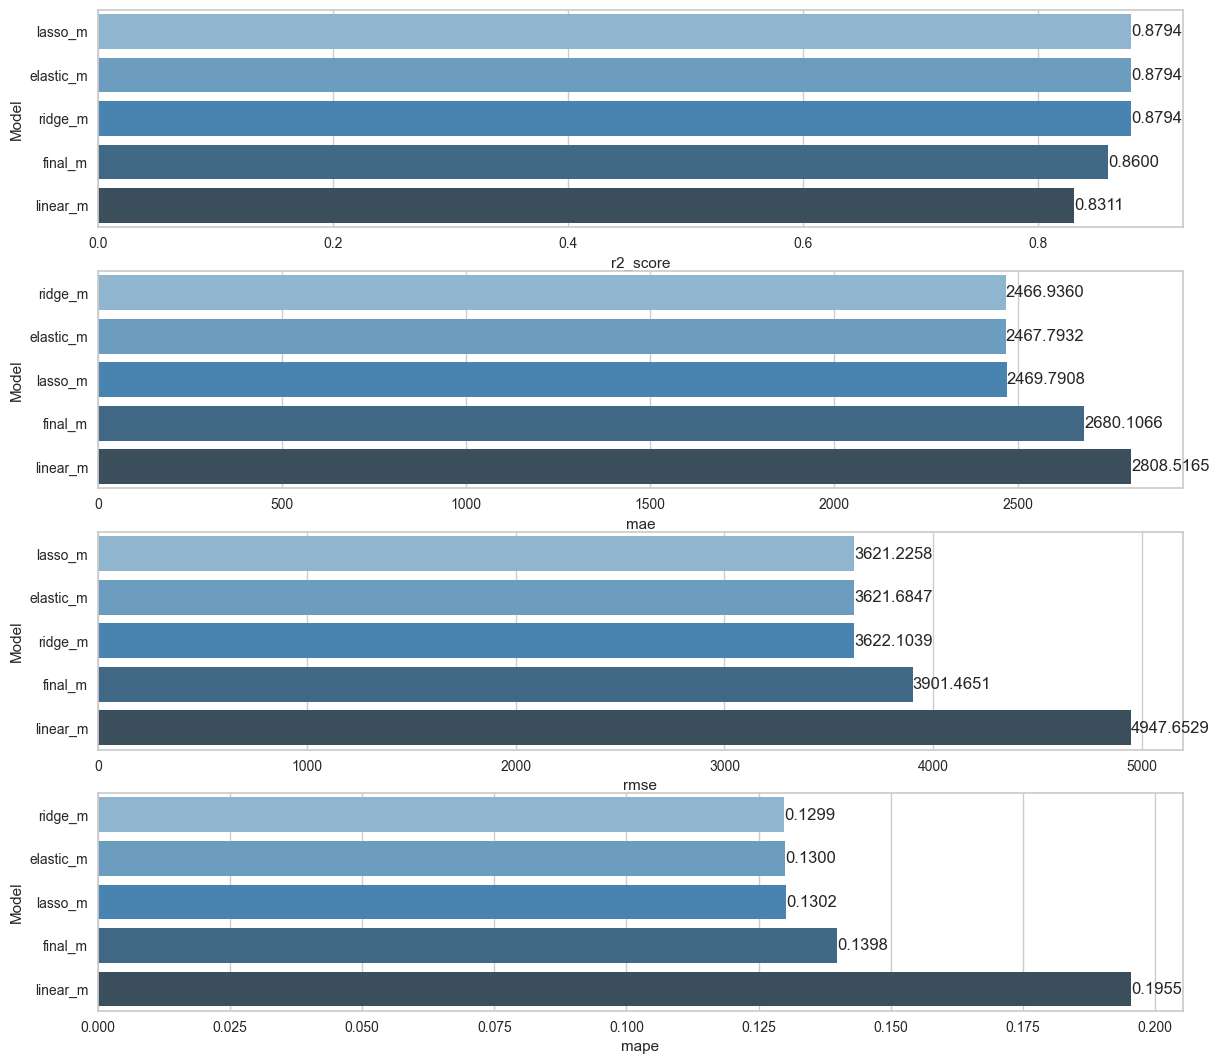

In [98]:
plt.figure(figsize=(14,13))

plt.subplot(411)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(412)
compare = compare.sort_values(by="mae", ascending=True)
ax=sns.barplot(x="mae", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(413)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(414)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")
plt.show()

## Prediction a new observation
- Create an observation and predict its price

In [99]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [100]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]
final_model = Pipeline(steps=operations)

In [101]:
final_model.fit(X, y)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

In [102]:
my_dict = {
    "make_model": 'Mercedes-Benz A 180',
    "power_kW": 85,
    "mileage": 30000,
    "age": 3,
    "engine_size": 1461,
    "type": "Used"
}

In [103]:
new_obs = pd.DataFrame([my_dict])
new_obs

,make_model,power_kW,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85,30000,3,1461,Used


In [104]:
final_model.predict(new_obs)

array([27100.53480812])